원문 : https://arxiv.org/pdf/1608.06993.pdf

DenseNet은 Resnet의 shortcout connection을 마치 Fully Connected Layer 처럼 촘촘히 가진다고 하면 더욱 성능 개선 효과가 클 것이라 생각하고 이를 실험을 입증한 논문이다.

In [1]:
from IPython.display import Image

# Dense Connectivity

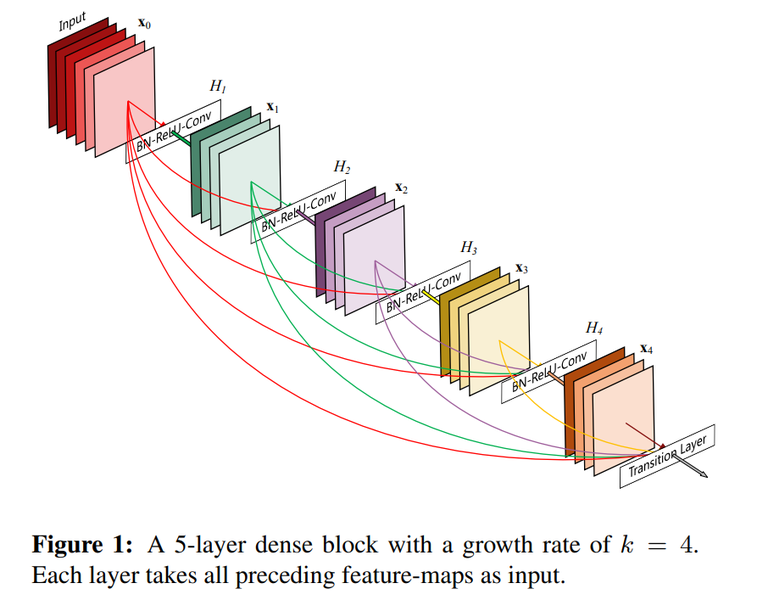

In [2]:
Image('./densenet_1.png')

DenseNet은 논문의 제목처럼 Densely Connected된 CNN구조를 제안하였고, 위 그림으로 쉽게설명이 가능하다.

일반적인 컨볼루션 network가 L개의 layer에 대해 각 layer간 하나씩 연결, 즉 총 L개의 연결을 갖는거와 달리, DenseNet의 기본블럭 L개의 layer가 있을 때 L(L+1)/2개의 직접적인 연결을 만든다. 이러한 연결 구조를 dense connectivity라고 부르고, 합성함수라고 부른다.

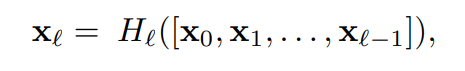

In [4]:
Image('./densenet_2.png')

각 레이어는 이전 레이어들에서 나온 특성맵(feature map) 전부를 입력값으로 받는다. 위 식에서 x0, x1, xl-1은 0번째 layer부터 l-1번째 layer를 거친 feature map을 의미하며 이들은 합성함수 H를 거쳐 l번째 layer의 출력값이 된다. DenseNet은 이를 통해 gradient vanishing을 개선하고 특성맵을 재사용할 수 있게 한다.

ResNet과 DenseNet의 차이점이라고 하면 ResNet은 feature map끼리 더해주는 방식이라고 하면, DenseNet은 feature map끼리 Connection 시키는 것이 가장 큰 차이점 이다.

# Growth Rate

첫번째 사진을 보았을 때, 매 layer이 진행될때 마다 feature map의 크기가 점점 커지는 것을 볼 수 있다. 이를 제한하기 위해 growth rate라는 값을 조정하여 layer가 거치면서 증가하게 되는 channel의 수를 조절 할 수 있다.

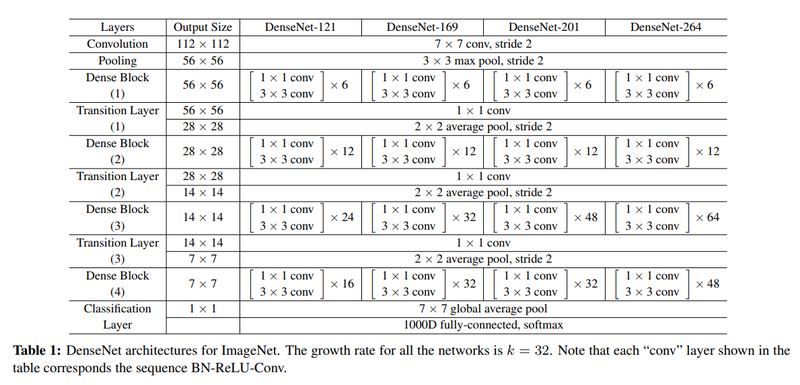

In [5]:
Image('./densenet_3.png')

위 사진은 DenseNet의 growth rate는 32를 사용했다. 2번째 dense block에서 각 layer에 입력받는 channel수를 간단하게 알아보자.

In [6]:
def get_channel_list():
    channel_list = []
    input_channel = 32
    growth_rate = 32
    for i in range(12):
        channel_list.append(input_channel + growth_rate*i)
    return channel_list

get_channel_list()

[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384]